In [35]:
import sys
print(sys.executable)


/Library/Developer/CommandLineTools/usr/bin/python3


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch


# Read data

## Indicators

In [37]:
# Dateien einlesen
df_steel = pd.read_excel("../data/world_steel_association/Steel_Data_Data_Mining.xlsx", sheet_name="master")

# Zusammenführen

df_steel.head()

,Country,Country Code,Total production of crude steel 2024,Apparent steel use (finished steel products) 2023,Exports of semi-finished and finished steel products 2023
0,Albania,ALB,0.000,418.494677,60.000
1,Algeria,DZA,4520.000,3874.000000,1730.000
2,Angola,AGO,285.000,432.639887,0.000
3,Argentina,ARG,3862.608,4987.000000,51.258
4,Armenia,ARM,0.000,200.650532,10.000


In [38]:
df_steel.columns

Index(['Country', 'Country Code', 'Total production of crude steel 2024',
       'Apparent steel use (finished steel products) 2023',
       'Exports of semi-finished and finished steel products 2023'],
      dtype='object')

## Metadata

In [39]:
# metadata = pd.read_pickle('../data/global_economy/metadata.pkl')
# metadata.head()

In [40]:
## year_df_combined.columns = year_df_combined.columns.str.replace(',', '', regex=False)
## metadata['Indicator'] = metadata['Indicator'].astype(str).str.replace(',', '', regex=False)
## 
## # Liste der Spaltennamen ab der 2. Spalte (Index 1)
## spalten_liste = year_df_combined.columns[4:].tolist()
## 
## # Liste der Werte in der Spalte 'Merkmale' von df2
## merkmale_liste = metadata['Indicator'].tolist()
## 
## # Vergleich: Welche Merkmale aus df2 sind in df1 enthalten?
## gemeinsam = list(set(spalten_liste) & set(merkmale_liste))
## nur_in_df1 = list(set(spalten_liste) - set(merkmale_liste))
## nur_in_df2 = list(set(merkmale_liste) - set(spalten_liste))
## 
## #print("Gemeinsame Merkmale:", gemeinsam)
## print("Nur in df1:", nur_in_df1)
## print("Nur in df2:", nur_in_df2)
## print("Nur in df2:", len(gemeinsam))

# Data Analysis

In [41]:
# Optional: bessere Formatierung in Jupyter
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [42]:
desired_columns = [
    'Industry value added billion USD',
    'Manufacturing value added billion USD',
    'Population size in millions',
    'Capital investment as percent of GDP',
    'Economic growth: the rate of change of real GDP',
    'Economic decline index 0 (low) - 10 (high)',
    'Economic freedom overall index (0-100)',
    'Gross Domestic Product billions of U.S. dollars',
    'Population growth percent',
    'Business freedom index (0-100)',
    'Trade freedom index (0-100)',
    'Economic globalization index (0-100)',
    'Literacy rate'
]

# Nur die ersten 4 Spalten und die gewünschten behalten
# df_filtered = df_steel.iloc[:, :4].join(df_steel[desired_columns])
df = df_steel

## Initial Data Analysis (IDA)

### Checking Form & Struktur

In [56]:
df.shape

(121, 5)

### Checking Datentypen

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    121 non-null    object 
 1   Country Code                                               121 non-null    object 
 2   Total production of crude steel 2024                       121 non-null    float64
 3   Apparent steel use (finished steel products) 2023          106 non-null    float64
 4   Exports of semi-finished and finished steel products 2023  106 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.9+ KB


### Checking first & last rows

In [45]:
df.head()

,Country,Country Code,Total production of crude steel 2024,Apparent steel use (finished steel products) 2023,Exports of semi-finished and finished steel products 2023
0,Albania,ALB,0.000,418.494677,60.000
1,Algeria,DZA,4520.000,3874.000000,1730.000
2,Angola,AGO,285.000,432.639887,0.000
3,Argentina,ARG,3862.608,4987.000000,51.258
4,Armenia,ARM,0.000,200.650532,10.000


In [46]:
df.tail()

,Country,Country Code,Total production of crude steel 2024,Apparent steel use (finished steel products) 2023,Exports of semi-finished and finished steel products 2023
116,Uzbekistan,UZB,1.000000e+03,4.034600e+03,160.000
117,"Venezuela, RB",VEN,3.000000e+01,NaN,NaN
118,Vietnam,VNM,2.207000e+04,NaN,NaN
119,World,WLD,1.881394e+06,1.778276e+06,427390.536
120,"Yemen, Rep.",YEM,1.070000e+02,NaN,NaN


### Checking Missing Values

In [47]:
# Übersicht zu fehlenden Werten
df.isnull().sum().sort_values(ascending=False)

Apparent steel use (finished steel products) 2023            15
Exports of semi-finished and finished steel products 2023    15
Country                                                       0
Country Code                                                  0
Total production of crude steel 2024                          0
dtype: int64

### Checking latest year for features

### Checking unique values

In [48]:
# Anzahl eindeutiger Werte pro Spalte
df.nunique().sort_values()

Exports of semi-finished and finished steel products 2023     83
Total production of crude steel 2024                          87
Apparent steel use (finished steel products) 2023            104
Country                                                      121
Country Code                                                 121
dtype: int64

### Basic statistics

In [49]:
# Grundstatistik
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,121,121,Albania,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,121,121,ALB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total production of crude steel 2024,121.0,NaN,NaN,NaN,31083.411298,193337.279076,0.0,20.0,871.924,4520.0,1881394.3771
Apparent steel use (finished steel products) 2023,106.0,NaN,NaN,NaN,31626.473901,192952.261247,0.0,487.827153,1727.429611,4865.75,1778276.300582
Exports of semi-finished and finished steel products 2023,106.0,NaN,NaN,NaN,7268.650528,42430.658979,0.0,8.8495,246.139,2059.60725,427390.536


### Detect outlieres

Z-Score

In [99]:
col = "Total production of crude steel 2024"

missing_countries = df[df[col].isna()]['Country'].unique()

# Fehlende Länder ausgeben
print("Total production of crude steel 2024 ist für folgende Länder nicht verfügbar:")
for country in missing_countries:
    print("-", country)

# NaN-Werte entfernen
df_complete = df.dropna(subset=[col])

# Z-Score berechnen
df_complete['Z_Score'] = zscore(df_complete[col])

# Ausreißer mit |Z| > 1.5
outliers = np.abs(df_complete['Z_Score']) > 1.5
df_outliers = df_complete.loc[outliers, ['Country', col, 'Z_Score']]

# Ergebnis anzeigen
df_outliers

Total production of crude steel 2024 ist für folgende Länder nicht verfügbar:


,Country,Total production of crude steel 2024,Z_Score
19,China,1.005090e+06,5.058810
119,World,1.881394e+06,9.610172


IQR

In [100]:
import pandas as pd

# Threshold definieren (z. B. 1.5 oder 3 für konservativer)
threshold = 1.5

# Nur numerische Spalten auswählen
numeric_cols = df.select_dtypes(include='number').columns

# Pro Spalte separat analysieren
for col in numeric_cols:
    # NaN-Werte entfernen, damit Berechnungen stabil sind
    df_clean = df[[col, 'Country']].dropna()

    # IQR berechnen
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Ausreißer identifizieren
    outliers = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    df_outliers = df_clean[outliers]

    # Nur anzeigen, wenn es überhaupt Ausreißer gibt
    if not df_outliers.empty:
        print(f"\n=== Spalte: {col} ===")
        print(f"IQR-Grenzen: {lower_bound:.2f} bis {upper_bound:.2f}")
        print(f"Anzahl Ausreißer: {df_outliers.shape[0]}")
        print(df_outliers[['Country', col]])



=== Spalte: Total production of crude steel 2024 ===
IQR-Grenzen: -6730.00 bis 11270.00
Anzahl Ausreißer: 18
                       Country  Total production of crude steel 2024
14                      Brazil                          3.374133e+04
17                      Canada                          1.218046e+04
19                       China                          1.005090e+06
37                     Germany                          3.723408e+04
45                       India                          1.495870e+05
46                   Indonesia                          1.700000e+04
47          Iran, Islamic Rep.                          3.095200e+04
51                       Italy                          2.000891e+04
53                       Japan                          8.400915e+04
57   Korea, Dem. People's Rep.                          6.353144e+04
68                      Mexico                          1.372000e+04
89          Russian Federation                          7.0690

Visually: histograms

In [52]:
# Kategorische Daten als "category" casten
categorical_columns = ['Country', 'Country Code']
for col in categorical_columns:
    df[col] = df[col].astype('category')

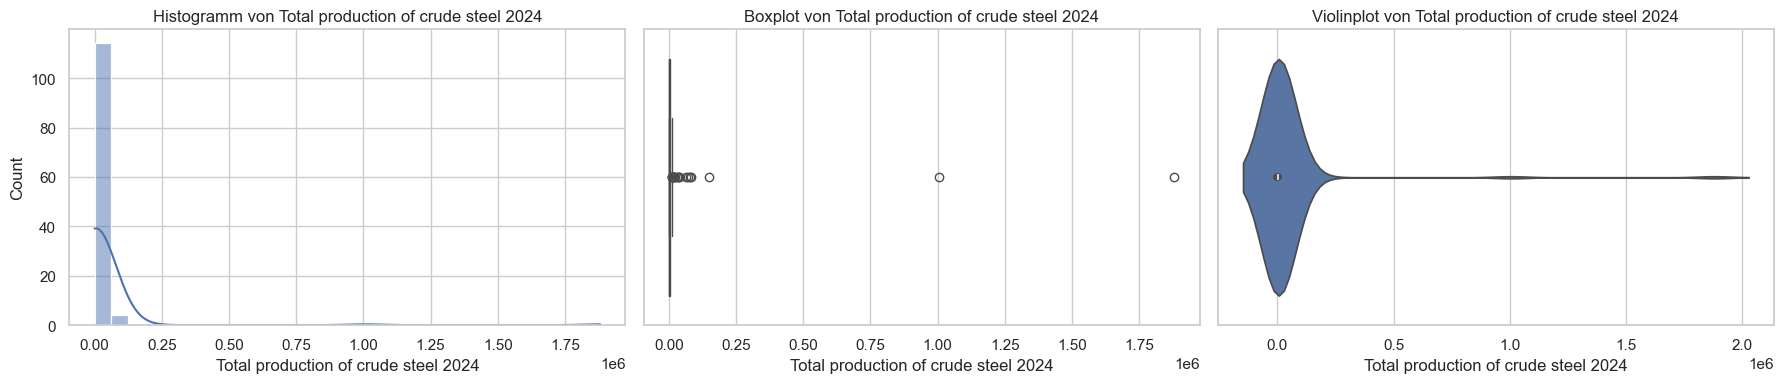

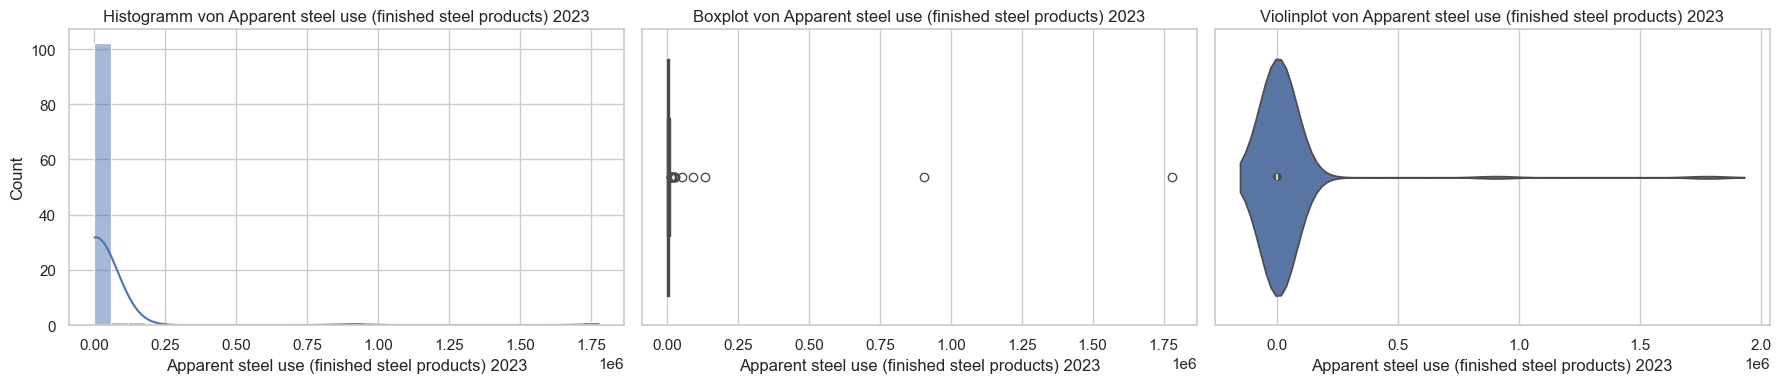

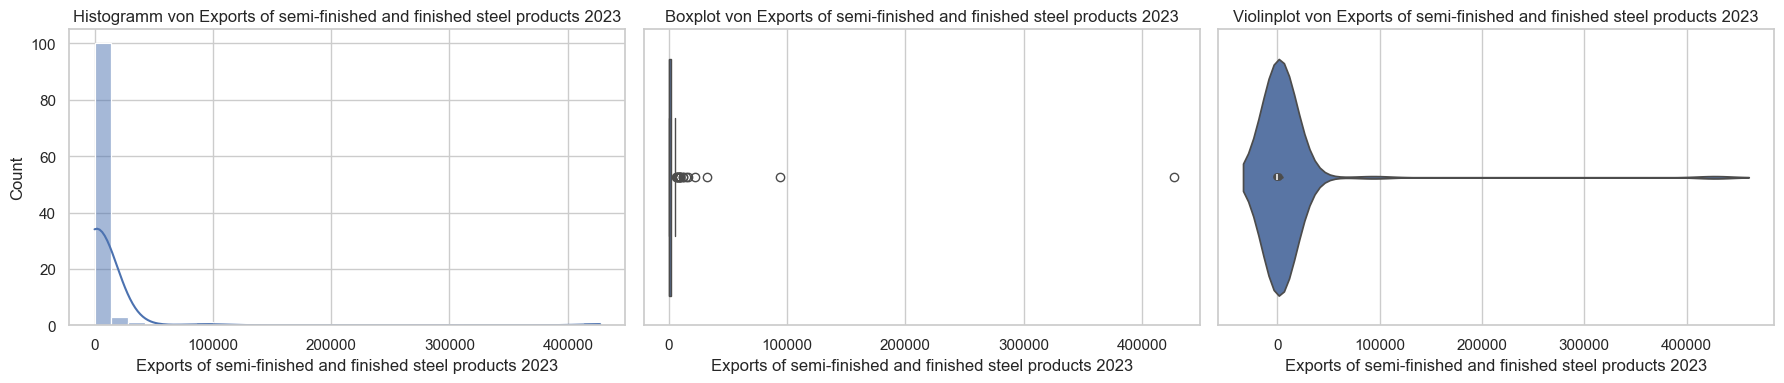

In [53]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    col_data = df[col].dropna()

    # Wenn Spalte nur NaNs enthält, überspringen
    if col_data.empty:
        print(f"Überspringe {col}: keine gültigen Werte.")
        continue

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogramm
    sns.histplot(col_data, kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f'Histogramm von {col}')

    # Boxplot
    sns.boxplot(x=col_data, ax=axes[1])
    axes[1].set_title(f'Boxplot von {col}')

    # Violinplot
    sns.violinplot(x=col_data, ax=axes[2])
    axes[2].set_title(f'Violinplot von {col}')

    plt.tight_layout()
    plt.show()


## Exploratory Data Analysis (EDA)

### Correlation Matrix

In [72]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,121,121,Albania,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,121,121,AGO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total production of crude steel 2024,121.0,NaN,NaN,NaN,31083.411298,193337.279076,0.0,20.0,871.924,4520.0,1881394.3771
Apparent steel use (finished steel products) 2023,106.0,NaN,NaN,NaN,31626.473901,192952.261247,0.0,487.827153,1727.429611,4865.75,1778276.300582
Exports of semi-finished and finished steel products 2023,106.0,NaN,NaN,NaN,7268.650528,42430.658979,0.0,8.8495,246.139,2059.60725,427390.536


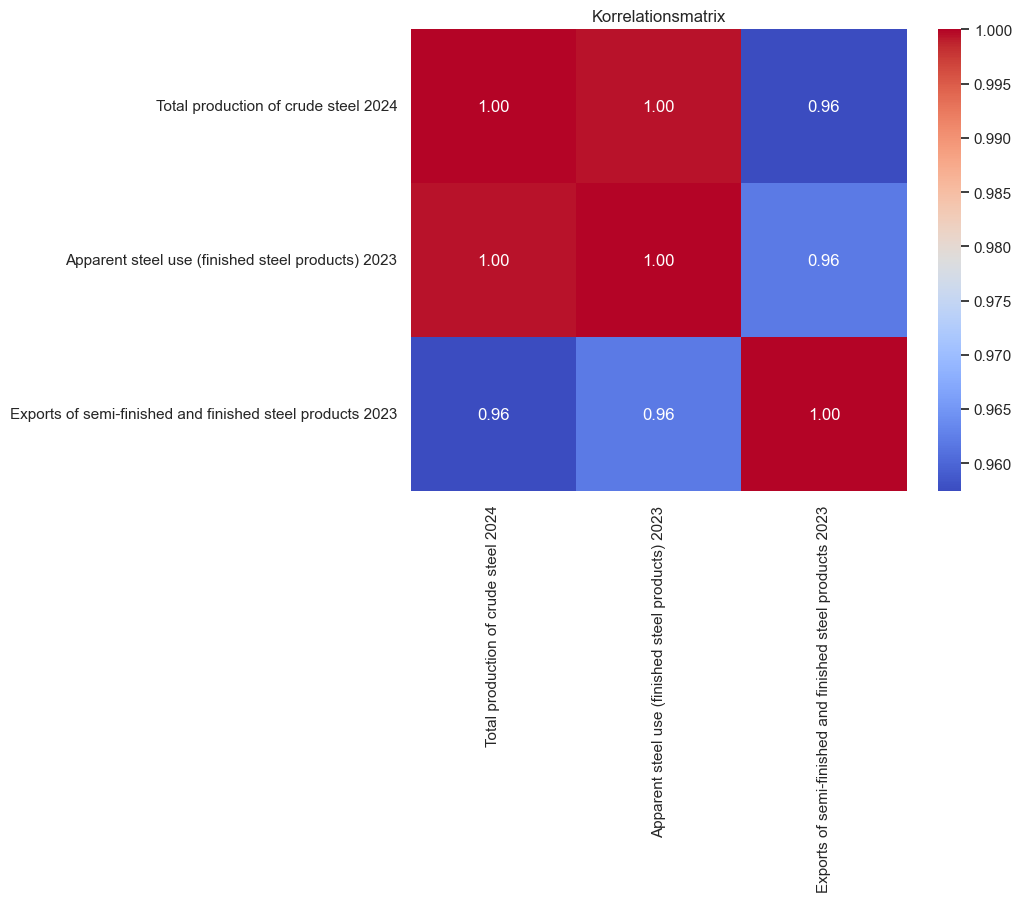

In [73]:
# Nur numerische Spalten auswählen
numeric_df = df.select_dtypes(include='number')

# Korrelationsmatrix berechnen
correlation_matrix = numeric_df.corr()

# Matrix anzeigen (optional: Heatmap für Visualisierung)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()


### Pairplot

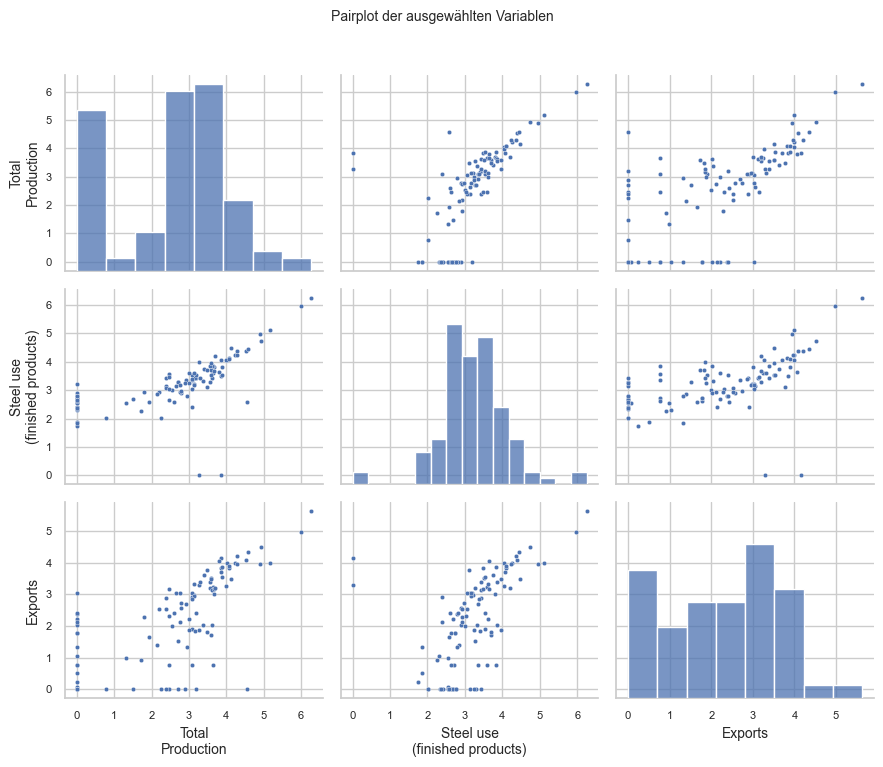

In [82]:
# Drei ausgewählte Variablen
selected_cols = [
    'Total production of crude steel 2024',
    'Apparent steel use (finished steel products) 2023',
    'Exports of semi-finished and finished steel products 2023'
]

# Achsentitel in zwei Zeilen umformatieren
label_map = {
    'Total production of crude steel 2024': 'Total\nProduction',
    'Apparent steel use (finished steel products) 2023': 'Steel use\n(finished products)',
    'Exports of semi-finished and finished steel products 2023': 'Exports'
}



# Log-Skalierung anwenden 
df_log = df[selected_cols].dropna().copy()
df_log[selected_cols] = df_log[selected_cols].apply(lambda x: np.log10(x + 1))

# Pairplot mit kleineren Punkten
g = sns.pairplot(
    df_log,
    height=2.5,
    aspect=1.2,
    plot_kws={'s': 10}
)

# Achsenbeschriftungen anpassen (2-zeilig, größer)
for ax in g.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel in label_map:
            ax.set_xlabel(label_map[xlabel], fontsize=10)
        if ylabel in label_map:
            ax.set_ylabel(label_map[ylabel], fontsize=10)
        ax.tick_params(axis='both', labelsize=8)

# Titel und Layout
plt.suptitle('Pairplot der ausgewählten Variablen', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


# Fazit

## IDA
China (und World) als Ausreißer. Total Production ohne Nullzeilen.
Features standardisieren?
## EDA
Features sind korreliert -> PCA ? Oder nur Total Production mit reinnehmen ? 